<a href="https://colab.research.google.com/github/habibarezq/ML-Assignments-25/blob/main/Assignment-2/notebooks/linear_models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Imports

In [1]:
from torchvision import datasets, transforms
import matplotlib.pyplot as plt
import torch
from torch.utils.data import TensorDataset,DataLoader ## to feed the data into the model
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import torch
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import sys, os
# sys.path.append(os.path.abspath("../"))
# from src.logisitc_manual import LogisticRegression
# from src.softmax_manual import SoftmaxRegression


In [ ]:
# comment if you are on vs code
from google.colab import files
uploaded = files.upload()
from logisitc_manual import LogisticRegression
from softmax_manual import SoftmaxRegression
from data_preprocessing import MNISTDataLoader

# 1. Data Preparation

### For Binary Logisitic Regression

In [ ]:
binary_data = MNISTDataLoader(batch_size=32, binary=True, digits=(0, 1))
train_loader_bin, val_loader_bin, test_loader_bin = binary_data.get_loaders()

X_train_flat_bin = binary_data.X_train
X_val_flat_bin = binary_data.X_val
X_test_flat_bin = binary_data.X_test

y_train_bin, y_val_bin, y_test_bin = binary_data.y_train, binary_data.y_val, binary_data.y_test

## For Softmax Regression

In [ ]:
multi_data = MNISTDataLoader(batch_size=32, binary=False)
train_loader, val_loader, test_loader = multi_data.get_loaders()

X_train_flat =  multi_data.X_train
X_val_flat =  multi_data.X_val
X_test_flat = multi_data.X_test

y_train, y_val, y_test = multi_data.y_train, multi_data.y_val, multi_data.y_test

# 2. Logisitic Regression Implementation

#### Train model


In [ ]:
n_features = 28 * 28
model = LogisticRegression(input_dim=n_features, learning_rate=0.01, max_epochs=100)
model.fit(train_loader_bin, val_loader_bin)

Epoch 10/100 - Train Loss: 0.0132, Train Acc: 0.9980 - Val Loss: 0.0144, Val Acc: 0.9973
Epoch 20/100 - Train Loss: 0.0090, Train Acc: 0.9980 - Val Loss: 0.0101, Val Acc: 0.9973
Epoch 30/100 - Train Loss: 0.0074, Train Acc: 0.9983 - Val Loss: 0.0085, Val Acc: 0.9980
Epoch 40/100 - Train Loss: 0.0065, Train Acc: 0.9986 - Val Loss: 0.0075, Val Acc: 0.9980
Epoch 50/100 - Train Loss: 0.0059, Train Acc: 0.9987 - Val Loss: 0.0069, Val Acc: 0.9980
Epoch 60/100 - Train Loss: 0.0054, Train Acc: 0.9988 - Val Loss: 0.0065, Val Acc: 0.9980
Epoch 70/100 - Train Loss: 0.0051, Train Acc: 0.9988 - Val Loss: 0.0061, Val Acc: 0.9980
Epoch 80/100 - Train Loss: 0.0048, Train Acc: 0.9988 - Val Loss: 0.0059, Val Acc: 0.9980
Epoch 90/100 - Train Loss: 0.0046, Train Acc: 0.9988 - Val Loss: 0.0057, Val Acc: 0.9980
Epoch 100/100 - Train Loss: 0.0044, Train Acc: 0.9988 - Val Loss: 0.0055, Val Acc: 0.9980


### Visualization

 ## Loss Curves & Accuracy Curve

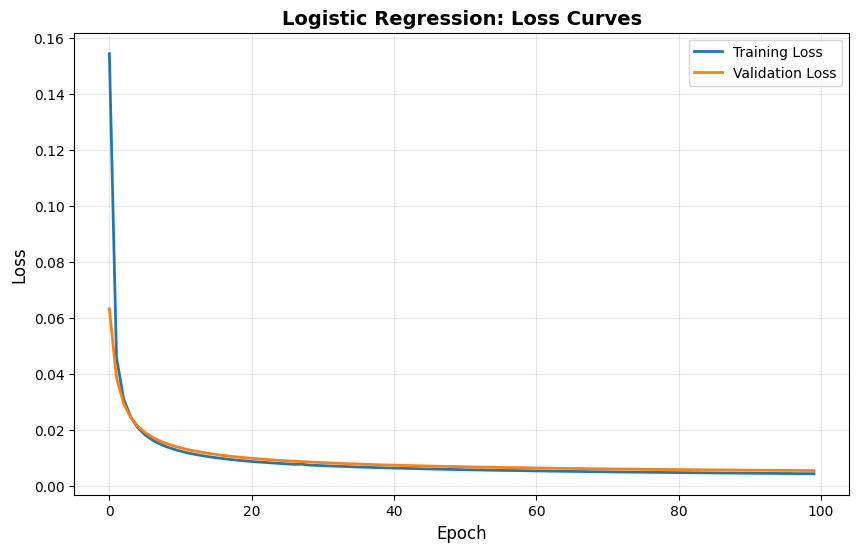

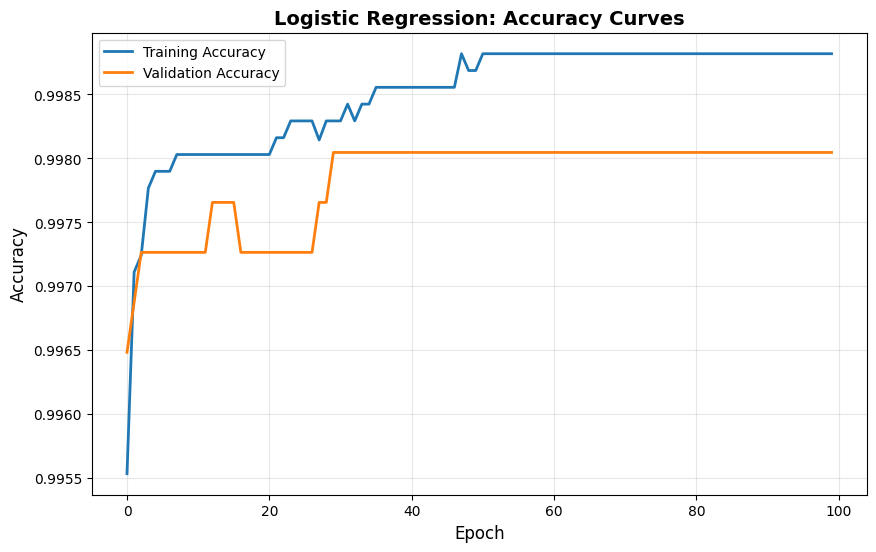

In [11]:
model.plot_curves()

## Test data

In [12]:
test_preds, _ = model.evaluate_test(X_test_flat_bin, y_test_bin)


Test Loss: 0.0070
Test Accuracy: 0.9976 (99.76%)


### Confusion Matrix

Confusion Matrix
[[1183    2]
 [   4 1344]]

True Negatives (0→0):  1183
False Positives (0→1): 2
False Negatives (1→0): 4
True Positives (1→1):  1344


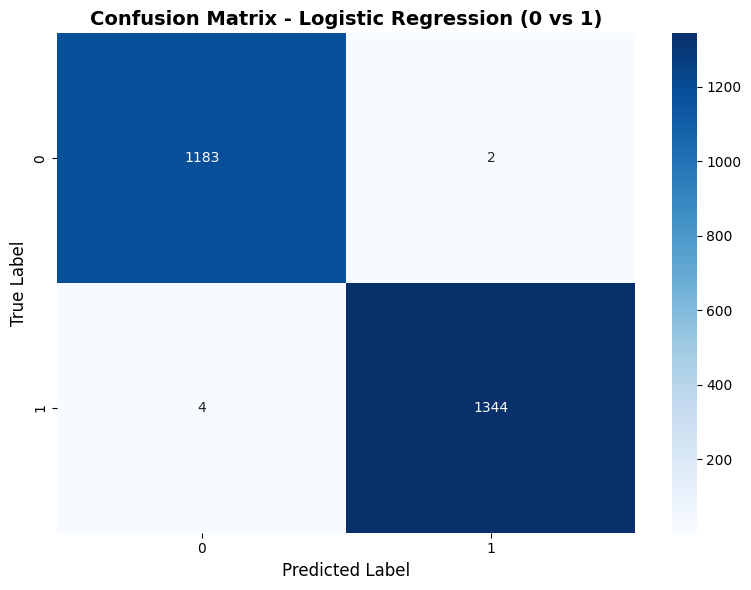

In [13]:
model.plot_confusion_matrix(y_test_bin, test_preds)

# 3. Softmax Regression Implementation


In [ ]:
n_features = 28 * 28
n_classes = 10

model2 = SoftmaxRegression(input_dim=n_features, num_classes=n_classes,
                          learning_rate=0.05, max_epochs=100, patience=10,min_delta=0.0001,early_stopping=False)

model2.fit(train_loader, val_loader)

Epoch 10/100 - Train Loss: 0.2806, Train Acc: 0.9221 - Val Loss: 0.3062, Val Acc: 0.9155
Epoch 20/100 - Train Loss: 0.2620, Train Acc: 0.9273 - Val Loss: 0.2985, Val Acc: 0.9191
Epoch 30/100 - Train Loss: 0.2532, Train Acc: 0.9298 - Val Loss: 0.2937, Val Acc: 0.9187
Epoch 40/100 - Train Loss: 0.2475, Train Acc: 0.9315 - Val Loss: 0.2920, Val Acc: 0.9200
Epoch 50/100 - Train Loss: 0.2429, Train Acc: 0.9332 - Val Loss: 0.2930, Val Acc: 0.9207
Epoch 60/100 - Train Loss: 0.2395, Train Acc: 0.9334 - Val Loss: 0.2927, Val Acc: 0.9210
Epoch 70/100 - Train Loss: 0.2366, Train Acc: 0.9345 - Val Loss: 0.2959, Val Acc: 0.9191
Epoch 80/100 - Train Loss: 0.2346, Train Acc: 0.9355 - Val Loss: 0.2918, Val Acc: 0.9207
Epoch 90/100 - Train Loss: 0.2323, Train Acc: 0.9363 - Val Loss: 0.2945, Val Acc: 0.9195
Epoch 100/100 - Train Loss: 0.2305, Train Acc: 0.9359 - Val Loss: 0.2936, Val Acc: 0.9199


## Plot Loss and Accuracy

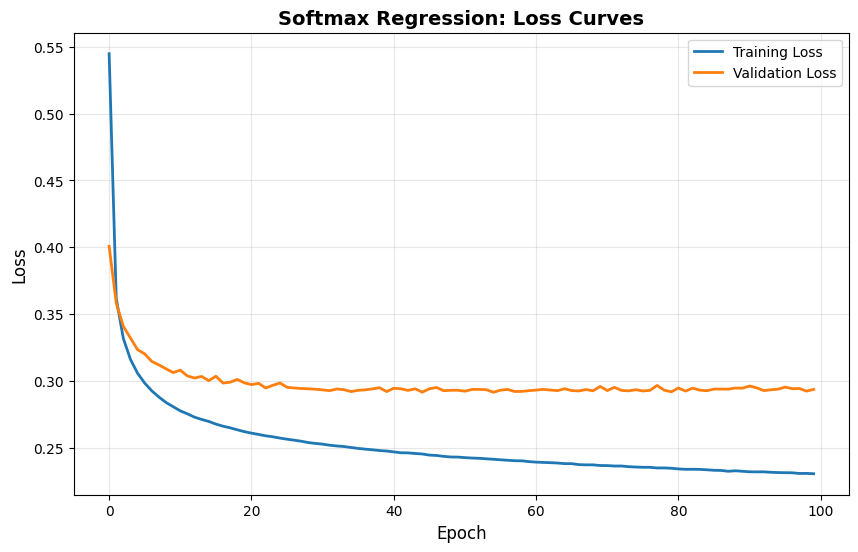

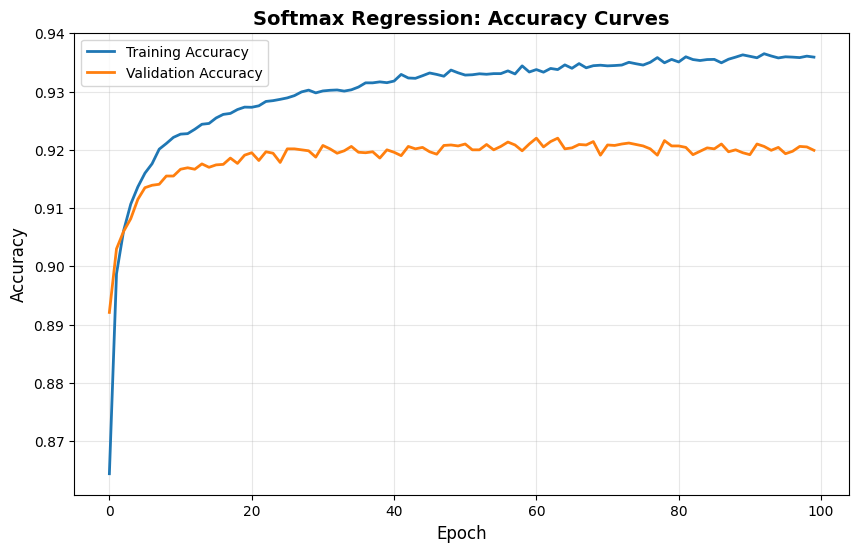

In [15]:
model2.plot_curves()

## Test Dataset

In [16]:
test_preds, test_probs,_,_ = model2.evaluate_test(X_test_flat, y_test)


Test Loss: 0.2887
Test Accuracy: 0.9205 (92.05%)


## Confusion Matrix

Confusion Matrix
[[1148    0    7    1    3   15    6    1    2    1]
 [   0 1309    5    5    1    7    2    6   11    2]
 [   8   11 1091   20   14    4   18    7   18    1]
 [   8    5   30 1106    1   38    2    8   24    5]
 [   3    7   12    1 1079    2   11    4    6   44]
 [  16    8    9   42   14  926   16    6   34   13]
 [  10    3   13    1    8   21 1120    0    3    4]
 [   2   11   19    5    9    2    1 1169    3   32]
 [  12   32   23   36    5   24    6    5 1010   17]
 [   4    7    3   10   30    3    0   36    9 1088]]


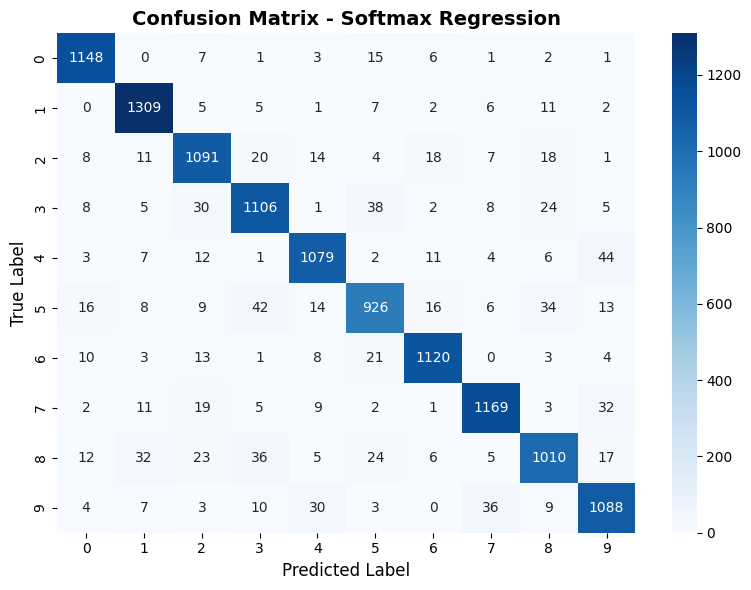

In [17]:
model2.plot_confusion_matrix(y_test, test_preds, class_labels=[str(i) for i in range(10)])


## Per Class Accuracy Analysis

In [18]:
model2.per_class_accuracy(y_test, test_preds, class_labels=list(range(10)))


Per-Class Accuracy:
Class 0: 96.96%
Class 1: 97.11%
Class 2: 91.53%
Class 3: 90.14%
Class 4: 92.30%
Class 5: 85.42%
Class 6: 94.67%
Class 7: 93.30%
Class 8: 86.32%
Class 9: 91.43%


It 's quite clear that the model perfomrs less efficiently on 3 and 8 likely due to similar shapes
